# LINEAR REGRESSION

## CODE THUAN

In [47]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df =  pd.read_csv('resource/Advertising.csv')

df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


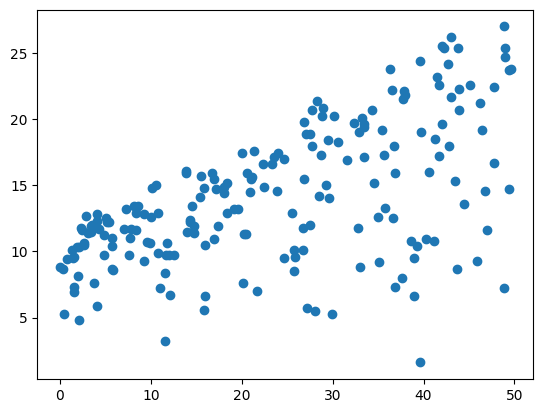

In [48]:
# X radio , Y Sales
X = df.values[:,2]
Y = df.values[:,4]

plt.scatter(X,Y,marker='o')
plt.show()

In [49]:
# func dự đoán
# y' = W*X + Bias
def predict(new_radio,weight, bias):
    return weight*new_radio + bias

In [50]:
# func chi phi: sum((y-y')**2)/N
def cost_function(X,Y,weight,bias):
    n = len(X)
    sum_error = 0
    for i in range(n):
        sum_error += (Y[i] - (weight*X[i] + bias))**2
    return sum_error/n

In [51]:
# func update weight va bias
def update_weight(X,Y,weight,bias, learning_rate):
    n = len(X)
    weight_temp = 0
    bias_temp  =  0
    for i in range(n):
        weight_temp += -2*X[i]*(Y[i] - (weight*X[i] + bias))
        bias_temp += -2*(Y[i] - (weight*X[i] + bias))
    weight -= (weight_temp/n)*learning_rate
    bias -= (bias_temp/n)*learning_rate
    
    return weight, bias

In [52]:
# write train
def train(X,Y,weight, bias, learning_rate, iter):
    cost_his = []
    for i in range(iter):
        weight, bias = update_weight(X,Y,weight, bias, learning_rate)
        cost = cost_function(X,Y,weight,bias)
        cost_his.append(cost)
    return weight, bias, cost_his


In [53]:
weight, bias, cost_his = train(X,Y, 0.003, 0.0014,0.001,60)

In [54]:
predict(19, weight, bias)

9.400327693828356

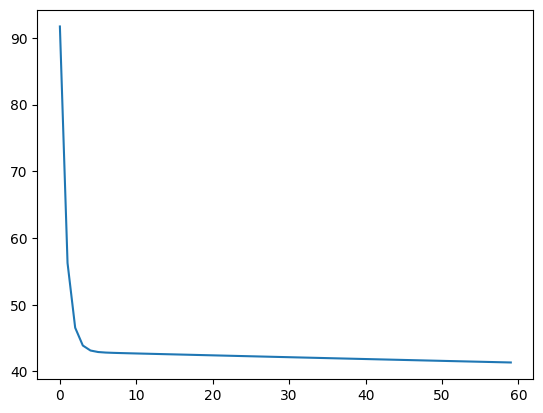

In [55]:
times = [i for i in range(60)]
plt.plot(times, cost_his)

## Thực nghiệm theo công thức

In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np 
import matplotlib.pyplot as plt

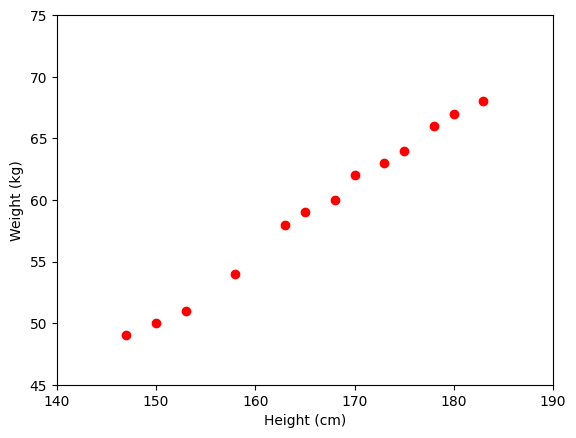

In [2]:
# height (cm)
X = np.array([[147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]])
# weight (kg)
y = np.array([[ 49, 50, 51,  54, 58, 59, 60, 62, 63, 64, 66, 67, 68]])
# Visualize data 
plt.plot(X, y, 'ro')
plt.axis([140, 190, 45, 75])
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [3]:
# (sum((y[i] - (x[i]w1 + w0))^2))/N
def tinh_loss(X, y, w1, w0):
    total = 0
    n = len(X[0])
    for i in range(len(X[0])):
        total+= (y[0][i] - (X[0][i]*w1 + w0))**2
    return total/n

tinh_loss(X,y, 0.36,0.1)

5.692707692307697

In [9]:
# f'(u) = 2*u*u'
# theo w1 = -2x(y - (w1*x + w0))
# theo w0 = -2(y - (w1*x + w0))
def daoham_loss(X, y, w1, w0):
    d_w0 = []
    d_w1 = []
    n = len(X[0])
    for i in range(len(X[0])):
        d_w0.append(1*(X[0][i]*w1 - y[0][i]))
        d_w1.append(X[0][i]*(X[0][i]*w1 - y[0][i]))

    return np.array(d_w0).sum()/len(d_w0), np.array(d_w1).sum()/len(d_w1)

daoham_loss(X,y, 0.5,0.5)

(23.884615384615383, 3966.576923076923)

In [30]:
w0 = 0.3
w1 = 0.1
loss = tinh_loss(X, y, w1, w0)
count = 0
while loss > 1:
    count += 1
    if count ==100:
        break
    d_w0, d_w1 = daoham_loss(X, y, w1, w0)
    print(d_w0,d_w1)
    alpha = 0.00001
    w0 = w0 - d_w0*alpha
    w1 = w1 - d_w1*alpha
    print(w0,w1)
    loss = tinh_loss(X, y, w1, w0)
    print(loss)


-42.66923076923077 -7157.330769230771
0.3004266923076923 0.17157330769230772
946.9583365868218
-30.76053349704142 -5166.893599224853
0.30073429764266274 0.22324224368455625
492.4177384247083
-22.16361745463883 -3729.992412881033
0.30095593381720914 0.2605421678133666
256.57802111331443
-15.957483924591388 -2692.6901305336164
0.30111550865645503 0.28746906911870274
134.42324635054524
-11.47726180740354 -1943.8592191325197
0.30123028127452905 0.30690766131002795
71.30560329836473
-8.242979122031507 -1403.276456120733
0.30131271106574936 0.3209404258712353
38.80388691703393
-5.908142987732162 -1013.0285120038402
0.3013717924956267 0.33107071099127366
22.148540566523305
-4.222619394298082 -731.3076205736774
0.3014140186895697 0.33838378719701045
13.672800416194622
-3.0058360225281837 -527.9326589251078
0.301444077049795 0.3436631137862615
9.40305029603962
-2.127437298485872 -381.1158047841717
0.30146535142277986 0.34747427183410323
7.284251551696381
-1.4933192325257478 -275.1283789717048
0

## THUC NGHIEM CODE MATRIX


In [1]:
import numpy as np 

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

# extended data 
x = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
x

array([[1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
        1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ],
       [0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 1.75, 2.  , 2.25, 2.5 , 2.75,
        3.  , 3.25, 3.5 , 4.  , 4.25, 4.5 , 4.75, 5.  , 5.5 ]])

In [2]:
# B1. Hàm ước lượng
def linear(x,y, w):
    # y_hat = w1*x + w0*1
    return np.dot(w,x)
def sigmoid(x, y, w):
    # y_hat = 1/[1 + e^-(w1*x + w0*1)]
    return 1 / (1 + np.exp(-np.dot(w,x)))

In [3]:
#B2. Hàm loss
def lose_MSE(y, y_hat):
    # Loss = 1/2 * (y-y_hat)^2 / N
    N = len(y)
    return 0.5*(y-y_hat)**2 / N

def lose_CE(y, y_hat):
    # cross entropy
    # Loss = -[y * log(y_hat) + (1 - y)*log(1 - y_hat)]
    N = len(y)
    return -(np.dot(y, np.log(y_hat.T)) + np.dot((1 - y),np.log(1-y_hat.T)))/N
    # return -( np.dot(y, np.log(y_hat)) + np.dot((1 - y),np.log(1-y_hat)))/N

In [4]:
# B3. Đạo hàm của hàm loss
def d_loss_MSE(x, y, y_hat):
    # d_loss = [d_w0, d_w1].T
    # d_loss = x.T*(y_hat - y)
    return np.dot(y_hat - y,x.T)

def d_loss_CE(x,y, y_hat):
    # d_loss = (y_hat - y)*x.T
    return np.dot(y_hat - y, x.T)

In [5]:
def update_w(w, d_loss, learning_rate):
    return w - d_loss*learning_rate

In [6]:
def train_MSE(X, y, w, learning_rate = 0.001, times = 10):
    x = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
    his_cos = []
    while times > 0:
        y_hat = linear(x,y,w)
        loss = lose_MSE(y,y_hat).sum()
        d_loss = d_loss_MSE(x,y,y_hat)
        w = update_w(w, d_loss,learning_rate)
        his_cos.append(loss)
        if loss < 0:
            break
        times -= 1
        
    return w, his_cos
# Toàn bộ mẫu cho 1 lần train
def train_CE_GradientDescent(X, y, w, learning_rate = 0.01, times = 10):
    x = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
    his_cos = []
    while times > 0:
        y_hat = sigmoid(x,y,w)
        loss = lose_CE(y,y_hat)
        d_loss = d_loss_CE(x,y,y_hat)
        w = update_w(w, d_loss,learning_rate)
        his_cos.append(loss)
        if loss < 0:
            break
        times -= 1
        
    return w, his_cos

w = np.array([0.05,0.05])
w_MSE, his_cos_MSE = train_MSE(X,y,w, learning_rate=0.001)
w_CE, his_cos_CE = train_CE_GradientDescent(X,y,w,learning_rate=0.00001)
print(f'w_MSE: {w_MSE}')
print(f'his_cos_MSE: {his_cos_MSE}')
print(f'w_CE: {w_CE}')
print(f'his_cos_CE: {his_cos_CE}')

w_MSE: [0.07104411 0.15884649]
his_cos_MSE: [0.15062890625000003, 0.12036484653761291, 0.10167500162748724, 0.0901260041830932, 0.08298269188241504, 0.07855760813998312, 0.07580967728847442, 0.07409660767071075, 0.07302213699790022, 0.0723417905403426]
w_CE: [0.04990531 0.05069485]
his_cos_CE: [0.6729786014854232, 0.6729539193818134, 0.6729292591735051, 0.6729046208366689, 0.672880004347502, 0.6728554096822276, 0.672830836817095, 0.6728062857283805, 0.672781756392386, 0.6727572487854401]


In [89]:
# 1 mẫu cho 1 lần train -> update w
def train_CE_StochasticGradientDescent(X, y, w, learning_rate = 0.01, times = 10):
    x = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
    his_cos = []
    
    while times > 0:
        for i in range(len(y)):
            # convert to np array
            x_p = np.array([x[0,i:i+1],
                            x[1,i:i+1]]                 )
            y_p = np.array([y[i]])
            print(f'input: x: {x_p} - y: {y_p}')
            
            y_hat = sigmoid(x_p,y_p,w)
            loss = lose_CE(y_p,y_hat)
            d_loss = d_loss_CE(x_p,y_p,y_hat)
            w = update_w(w, d_loss,learning_rate)
            print(f'update w: {w}')
            
        print(f'repeat: w: {w} - loss: {loss}')
        his_cos.append(loss)
        # if loss < 0:
        #     break
        times -= 1
        
    return w, his_cos
train_CE_StochasticGradientDescent(X,y,w,learning_rate=0.1)

input: x: [[1. ]
 [0.5]] - y: [0]
update w: [-0.00187412  0.02406294]
input: x: [[1.  ]
 [0.75]] - y: [0]
update w: [-0.05227844 -0.0137403 ]
input: x: [[1.]
 [1.]] - y: [0]
update w: [-0.10062857 -0.06209043]
input: x: [[1.  ]
 [1.25]] - y: [0]
update w: [-0.14618429 -0.11903508]
input: x: [[1. ]
 [1.5]] - y: [0]
update w: [-0.18813647 -0.18196334]
input: x: [[1.  ]
 [1.75]] - y: [0]
update w: [-0.22573621 -0.24776289]
input: x: [[1.  ]
 [1.75]] - y: [1]
update w: [-0.15982542 -0.13241901]
input: x: [[1.]
 [2.]] - y: [0]
update w: [-0.19936555 -0.21149928]
input: x: [[1.  ]
 [2.25]] - y: [1]
update w: [-0.13309803 -0.06239735]
input: x: [[1. ]
 [2.5]] - y: [0]
update w: [-0.17592066 -0.16945393]
input: x: [[1.  ]
 [2.75]] - y: [1]
update w: [-0.11040195  0.01072253]
input: x: [[1.]
 [3.]] - y: [0]
update w: [-0.15844709 -0.13341289]
input: x: [[1.  ]
 [3.25]] - y: [1]
update w: [-0.0940638   0.07583279]
input: x: [[1. ]
 [3.5]] - y: [0]
update w: [-0.14833713 -0.11412384]
input: x: [[

(array([-1.61793933,  0.92015725]),
 [0.059836759800790604,
  0.05379241851629513,
  0.05040410291476143,
  0.047413506575991575,
  0.044746222155818624,
  0.04236051593925559,
  0.04022013863034262,
  0.038293630754705266,
  0.03655385919295616,
  0.034977508075144534])

In [90]:
# 4 mẫu cho 1 lần train -> update w
def train_CE_BatchGradientDescent(X, y, w, learning_rate = 0.01, times = 10):
    x = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
    his_cos = []
    n_train = 4
    length = int(len(y)/n_train)
    print(n_train)
    while times > 0:
        for i in range(length):
            # convert to np array
            x_p = np.array([x[0,i*n_train:(i+1)*n_train], # i = 0 => [0,0:4], i = 1 => [0,4:8]
                            x[1,i*n_train:(i+1)*n_train]]) 
            y_p = np.array(y[i*n_train:(i+1)*n_train])
            print(f'input: x: {x_p} - y: {y_p}')
            
            y_hat = sigmoid(x_p,y_p,w)
            loss = lose_CE(y_p,y_hat)
            d_loss = d_loss_CE(x_p,y_p,y_hat)
            w = update_w(w, d_loss,learning_rate)
            print(f'update w: {w}')
            
        his_cos.append(loss)
        print(f'repeat: w: {w} - loss: {loss}')
        # if loss < 0:
        #     break
        times -= 1
        
    return w, his_cos

train_CE_BatchGradientDescent(X,y,w,learning_rate=0.1)

4
input: x: [[1.   1.   1.   1.  ]
 [0.5  0.75 1.   1.25]] - y: [0 0 0 0]
update w: [-0.15936768 -0.13358648]
input: x: [[1.   1.   1.   1.  ]
 [1.5  1.75 1.75 2.  ]] - y: [0 0 1 0]
update w: [-0.22055716 -0.24026636]
input: x: [[1.   1.   1.   1.  ]
 [2.25 2.5  2.75 3.  ]] - y: [1 0 1 0]
update w: [-0.1403008  -0.05301967]
input: x: [[1.   1.   1.   1.  ]
 [3.25 3.5  4.   4.25]] - y: [1 0 1 1]
update w: [-0.00671324  0.4737387 ]
input: x: [[1.   1.   1.   1.  ]
 [4.5  4.75 5.   5.5 ]] - y: [1 1 1 1]
update w: [0.0290786  0.64842683]
repeat: w: [0.0290786  0.64842683] - loss: 0.0938531413684286
input: x: [[1.   1.   1.   1.  ]
 [0.5  0.75 1.   1.25]] - y: [0 0 0 0]
update w: [-0.22842661  0.4184846 ]
input: x: [[1.   1.   1.   1.  ]
 [1.5  1.75 1.75 2.  ]] - y: [0 0 1 0]
update w: [-0.37771548  0.15600186]
input: x: [[1.   1.   1.   1.  ]
 [2.25 2.5  2.75 3.  ]] - y: [1 0 1 0]
update w: [-0.38089264  0.12144367]
input: x: [[1.   1.   1.   1.  ]
 [3.25 3.5  4.   4.25]] - y: [1 0 1 1]
up

(array([-1.7610001 ,  1.01086016]),
 [0.0938531413684286,
  0.11285579817415968,
  0.11244173069239467,
  0.11203059423735011,
  0.11139298101105374,
  0.11050625272817191,
  0.1093849134765725,
  0.1080636271698159,
  0.10658497745168591,
  0.104991849793764])

In [107]:
# generality func

def train_CE(X, y, w, descent = 1, learning_rate = 0.01, times = 10):
    # gradient
    if type(descent) == int:
        if descent <= len(y):
            n_train = descent
        elif descent > len(y):
            n_train = len(y)
    else:
        if descent == 'nomal':
            n_train = len(y)
        else:
            return 'descent is "nomal" or int+'

    x = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
    his_cos = []
    length = int(len(y)/n_train)
    print(n_train)
    while times > 0:
        for i in range(length):
            # convert to np array
            x_p = np.array([x[0,i*n_train:(i+1)*n_train], # i = 0 => [0,0:4], i = 1 => [0,4:8]
                            x[1,i*n_train:(i+1)*n_train]]) 
            y_p = np.array(y[i*n_train:(i+1)*n_train])
            print(f'input: x: {x_p} - y: {y_p}')
            
            y_hat = sigmoid(x_p,y_p,w)
            loss = lose_CE(y_p,y_hat)
            d_loss = d_loss_CE(x_p,y_p,y_hat)
            w = update_w(w, d_loss,learning_rate)
            print(f'update w: {w}')
            
        his_cos.append(loss)
        print(f'repeat: w: {w} - loss: {loss}')
        # if loss < 0:
        #     break
        times -= 1
        
    return w, his_cos

train_CE(X,y,w,descent=23, learning_rate=0.1)

20
input: x: [[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.  ]
 [0.5  0.75 1.   1.25 1.5  1.75 1.75 2.   2.25 2.5  2.75 3.   3.25 3.5
  4.   4.25 4.5  4.75 5.   5.5 ]] - y: [0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1]
update w: [-0.04427605  0.7463215 ]
repeat: w: [-0.04427605  0.7463215 ] - loss: 0.6729786014854232
input: x: [[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.  ]
 [0.5  0.75 1.   1.25 1.5  1.75 1.75 2.   2.25 2.5  2.75 3.   3.25 3.5
  4.   4.25 4.5  4.75 5.   5.5 ]] - y: [0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1]
update w: [-0.72668456 -0.48098713]
repeat: w: [-0.72668456 -0.48098713] - loss: 0.8244336154526752
input: x: [[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.  ]
 [0.5  0.75 1.   1.25 1.5  1.75 1.75 2.   2.25 2.5  2.75 3.   3.25 3.5
  4.   4.25 4.5  4.75 5.   5.5 ]] - y: [0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1]
up

(array([-2.46172521,  1.1964425 ]),
 [0.6729786014854232,
  0.8244336154526752,
  1.4209729984765036,
  2.510431373812595,
  0.7198076193633672,
  1.1183513387994133,
  2.2718670029438512,
  0.6130439646301833,
  0.838674985128207,
  1.8175551617751715])

In [8]:
def predict_MSE(X,w):
    x = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
    return linear(x, y, w)

def predict_CE(X,w):
    x = np.concatenate((np.ones((1, X.shape[1])), X), axis = 0)
    return sigmoid(x, y, w)

x_pre = np.array([[9,0.2, 5]])

result_MSE = predict_MSE(X=x_pre, w=w_MSE)
result_CE = predict_CE(X=x_pre, w=w_CE)
print(f'result_MSE: {result_MSE}')
print(f'result_CE: {result_CE}')

result_MSE: [1.50066249 0.10281341 0.86527654]
result_CE: [0.62390562 0.51500656 0.57526847]


In [9]:
a = np.array([1,0,3,6])
b = np.array([[3,4,5,8]])
print(a.shape)
print(b.shape)
print(np.dot(a, b.T))
a = np.array([[1,0,3,6]])
print(a.shape)
print(np.dot(a, b.T))

(4,)
(1, 4)
[66]
(1, 4)
[[66]]
